# Crop Production Optimization

Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. 

**Context**

This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India. The goal of this dataset is to 

1) Analyze different conditions and forming cluster of corps

2) Perform Multiclass classification to predict which crop can be given in test conditions 

**Data fields**

N - ratio of Nitrogen content in soil

P - ratio of Phosphorous content in soil

K - ratio of Potassium content in soil

temperature - temperature in degree Celsius

humidity - relative humidity in %

ph - ph value of the soil

rainfall - rainfall in mm

# Import Data and Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight') # Remember this you will need it later.
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [20]:
df = pd.read_csv('Crop_recommendation.csv')
Y_label = 'label'
X_columns = ['N', 'P', "K", 'temperature', 'humidity', 'ph', 'rainfall']

distinct_labels = df['label'].unique()


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [29]:
df.shape

(2200, 8)

In [31]:
df['label'].value_counts()


rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

this seems to be a very balanced dataset

In [7]:
!pip install ipywidgets

In [12]:
from ipywidgets import interact

@interact
def summary(crops=list(df['label'].value_counts().index)):
    x = df[df['label']==crops]
    print(x.describe())
    

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [25]:

@interact
def compare_conditions(condition=X_columns):
    for label in distinct_labels:
        crop_data = df[df['label']==label]
        print(f"For {label} the mean of {condition} is {crop_data[condition].mean()}")

interactive(children=(Dropdown(description='condition', options=('N', 'P', 'K', 'temperature', 'humidity', 'ph…

In [28]:
@interact
def compare_conditions_over_avg(condition=X_columns):
    print(f"Crops which require greater than average {condition}")

    condition_df_mean = df[condition].mean()
    filtered_data = df[df[condition] > condition_df_mean]
    print(filtered_data.label.unique())
    print("--------------------------------------------")
    print(f"Crops which require less than average {condition}")

    filtered_data = df[df[condition] <= condition_df_mean]
    print(filtered_data.label.unique())

interactive(children=(Dropdown(description='condition', options=('N', 'P', 'K', 'temperature', 'humidity', 'ph…

array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>,
        <AxesSubplot:title={'center':'temperature'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

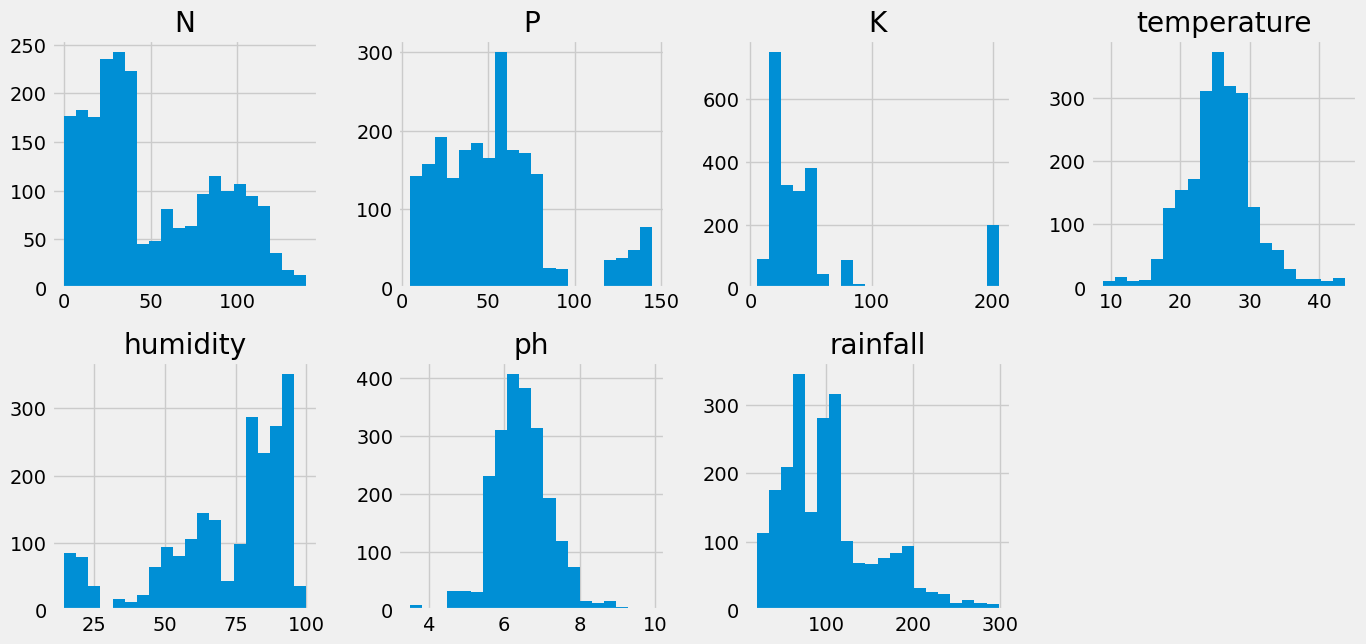

In [54]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)


observation:

P is right skewed

Humidity left skewed

<AxesSubplot:>

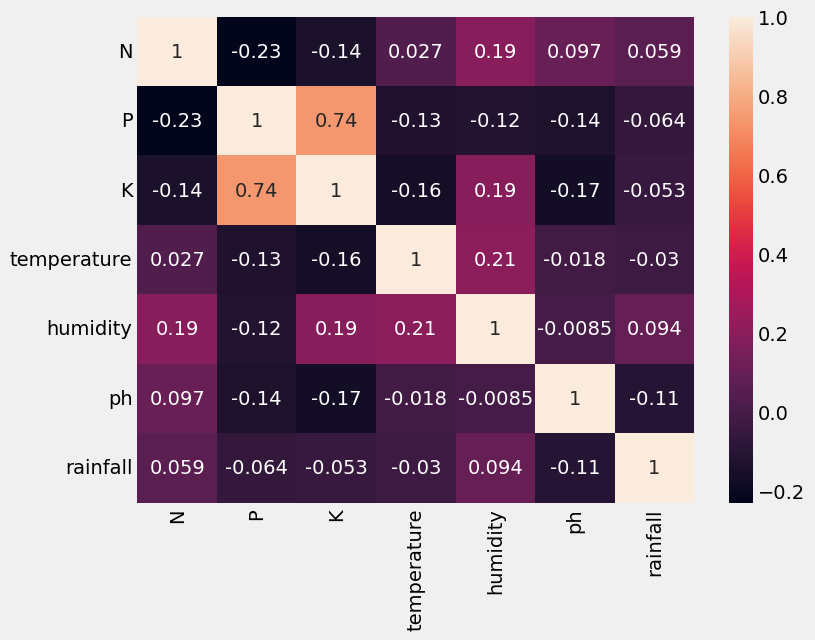

In [32]:
sns.heatmap(df.corr(),annot=True)

In [46]:
@interact
def dist_plotter(feature=X_columns):
#     for feature in X_columns:
    sns.displot(df[feature])
    plt.xlabel(feature)
    plt.grid()

interactive(children=(Dropdown(description='feature', options=('N', 'P', 'K', 'temperature', 'humidity', 'ph',…

In [47]:
@interact
def box_plotter(feature=X_columns):
    sns.boxplot(df[feature])
    plt.xlabel(feature)

interactive(children=(Dropdown(description='feature', options=('N', 'P', 'K', 'temperature', 'humidity', 'ph',…

In [59]:

@interact
def compute_outliers(feature=X_columns):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    low_lim = q1 - 1.5 * IQR
    up_lim = q3 + 1.5 * IQR
    print(f'25 percentile  {q1}')
    print(f'75 percentile  {q3}')
    print(f'iqr  {iqr}')
    print(f'lower_limit  {low_lim}')
    print(f'upper_limit  {up_lim}')
    high_data_labels = df[df[feature]>up_lim].label.unique()
    low_data_labels = df[df[feature]<=low_lim].label.unique()
    only_high_data_labels = [label for label in high_data_labels if label not in set(low_data_labels)]
    
    only_low_data_labels = [label for label in low_data_labels if label not in set(high_data_labels)]
    unaffected_labels = list(set(high_data_labels).intersection(low_data_labels))
    print(f"Crops which require high {feature}: ", only_high_data_labels)
    print(f"Crops which require low {feature}: ", only_low_data_labels)
    print(f"Crops which are unaffected by {feature}: ", unaffected_labels)
    
    

interactive(children=(Dropdown(description='feature', options=('N', 'P', 'K', 'temperature', 'humidity', 'ph',…

In [60]:
print('Summer Crops:', df[(df['temperature']>30) & (df['humidity']>50)]['label'].unique())
print('Winter Crops:', df[(df['temperature']<20) & (df['humidity']>30)]['label'].unique())
print('Rainy Crops:', df[(df['rainfall']>200) & (df['humidity']>30)]['label'].unique())

Summer Crops: ['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Winter Crops: ['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crops: ['rice' 'papaya' 'coconut']


# Clustering with K-Means

In [61]:
z = df.drop(['label'],axis=1)
z = df.loc[:,z.columns].values
x_df = pd.DataFrame(z)
x_df.head()

,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340


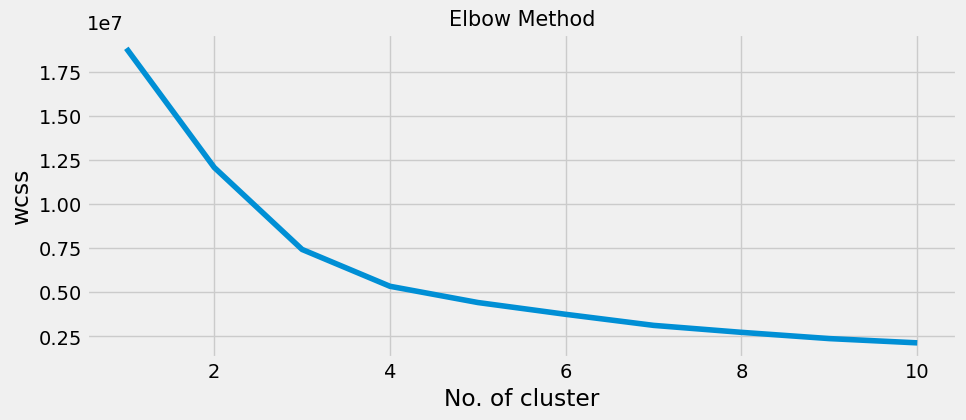

In [62]:
#Determine Optimum number of cluster by elbow method
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10,4)
wcss = []
for i in range (1,11):
    km = KMeans(n_clusters =i, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(z)
    wcss.append(km.inertia_)
    
#plot the results
plt.plot(range(1,11), wcss)
plt.title('Elbow Method', fontsize= 15)
plt.xlabel('No. of cluster')
plt.ylabel('wcss')
plt.show()

we get two elbows at 3 and 4. As per elbow method definition we take the last one so our no. of cluster will be #4



In [63]:
km = KMeans(n_clusters =4, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
y_means= km.fit_predict(z)

a = df['label']
y_means = pd.DataFrame(y_means)
w = pd.concat([y_means, a], axis=1)
w =w.rename(columns= {0:'cluster'})


In [64]:
#Check Cluster of each group

for i in range(0,4): #for 4 clusters 0,1,2,3
    print('Crops is cluster', i, w[w['cluster']==i]['label'].unique())
    print('---------------------------------------------------------------------------------------')


Crops is cluster 0 ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------------------------------
Crops is cluster 1 ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------------------------------
Crops is cluster 2 ['grapes' 'apple']
---------------------------------------------------------------------------------------
Crops is cluster 3 ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
---------------------------------------------------------------------------------------


some of the crops are more than in one cluster. This is known as soft clustering

We want our crops to be in single cluster so next step we are going to do hard clustering

In [66]:
# we check for value counts in cluster. if there are more than 50 (or 50%) it is part of the cluster else it is not
for i in range(0,4):
    counts=w[w['cluster']==i]['label'].value_counts()
    d = w.loc[w['label'].isin(counts.index[counts>=50])]
    d=d['label'].value_counts()
    print('Crops in Cluster', i,':', list(d.index))
    print('--------------------------------------------------------------------------------')

Crops in Cluster 0 : ['chickpea', 'kidneybeans', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'mango', 'orange']
--------------------------------------------------------------------------------
Crops in Cluster 1 : ['maize', 'banana', 'watermelon', 'muskmelon', 'cotton']
--------------------------------------------------------------------------------
Crops in Cluster 2 : ['grapes', 'apple']
--------------------------------------------------------------------------------
Crops in Cluster 3 : ['rice', 'pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee']
--------------------------------------------------------------------------------


In [99]:
from sklearn.cluster import KMeans

@interact
def kmeans_with_2_features(feature1=X_columns, feature2=X_columns, cluster_count=range(1,11)):
    print(f"Applying K_means with {feature1} and {feature2}")
    data = df[[feature1, feature2]]
    X2 = data.iloc[:, :].values 
    plt.rcParams['figure.figsize'] = (10,4)
    wcss = []
    for i in range (1,11):
        km = KMeans(n_clusters =i, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
        km.fit(X2)
        wcss.append(km.inertia_)

    #plot the results
    plt.plot(range(1,11), wcss)
    plt.title('Elbow Method', fontsize= 15)
    plt.xlabel('No. of cluster')
    plt.ylabel('wcss')
#     plt.show()
    km = KMeans(n_clusters=cluster_count, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
    y_means= km.fit_predict(X2)
    labels2 = km.labels_
    centroids2 = km.cluster_centers_

    a = df['label']
    y_means = pd.DataFrame(y_means)
    w = pd.concat([y_means, a], axis=1)
    w =w.rename(columns= {0:'cluster'})
    print("=========Soft clustering==============")
    for i in range(0,cluster_count): #for 4 clusters 0,1,2,3
        print('Crops is cluster', i, w[w['cluster']==i][Y_label].unique())
        print('---------------------------------------------------------------------------------------')
    
    print("=========Hard clustering==============")
    for i in range(0,cluster_count):
        counts=w[w['cluster']==i][Y_label].value_counts()
        d = w.loc[w[Y_label].isin(counts.index[counts>=50])]
        d=d[Y_label].value_counts()
        print('Crops in Cluster', i,':', list(d.index))
        print('--------------------------------------------------------------------------------')
    
    h = 0.02
    x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
    y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
  
    Z2 = km.predict(np.c_[xx.ravel(), yy.ravel()]) 
    
    plt.figure(2 , figsize = (15 , 7) )
    plt.clf()
    Z2 = Z2.reshape(xx.shape)
    plt.imshow(Z2 , interpolation='nearest', 
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

    plt.scatter( x = feature1 ,y = feature2 , data = data  ,
                s = 200 )
    plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
    plt.ylabel(feature2) , plt.xlabel(feature1)
    plt.show()


interactive(children=(Dropdown(description='feature1', options=('N', 'P', 'K', 'temperature', 'humidity', 'ph'…

## Classification

In [100]:
# Undersampling before cross validating (prone to overfit)
X = df.drop(Y_label, axis=1)
y = df[Y_label]

# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [101]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [104]:
# Let's implement simple classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    'NaiveBayes': GaussianNB()
}

In [105]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Classifiers:  LogisticRegression Has a training score of 96.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 98.0 % accuracy score
Classifiers:  SVC Has a training score of 98.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 99.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 100.0 % accuracy score


#### Model Tuning

In [107]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}


nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
nb_model = nbModel_grid.best_estimator_

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [108]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

nb_score = cross_val_score(nb_model, X_train, y_train, cv=5)
print('Naive Bayes Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Logistic Regression Cross Validation Score:  96.14%
Knears Neighbors Cross Validation Score 98.01%
Support Vector Classifier Cross Validation Score 98.41%
DecisionTree Classifier Cross Validation Score 37.16%
Naive Bayes Classifier Cross Validation Score 37.16%


In [109]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(lr_estimator, knn_estimator, svc_estimator, dt_estimator,nb_estimator, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,18), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        lr_estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        knn_estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        svc_estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        dt_estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    
    
    # Fifth Estimator
#     train_sizes, train_scores, test_scores = learning_curve(
#         nb_estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     ax5.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="#ff9124")
#     ax5.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
#     ax5.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
#              label="Training score")
#     ax5.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
#              label="Cross-validation score")
#     ax5.set_title("Naive Bayes Classifier \n Learning Curve", fontsize=14)
#     ax5.set_xlabel('Training size (m)')
#     ax5.set_ylabel('Score')
#     ax5.grid(True)
#     ax5.legend(loc="best")
    return plt

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

<module 'matplotlib.pyplot' from '/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

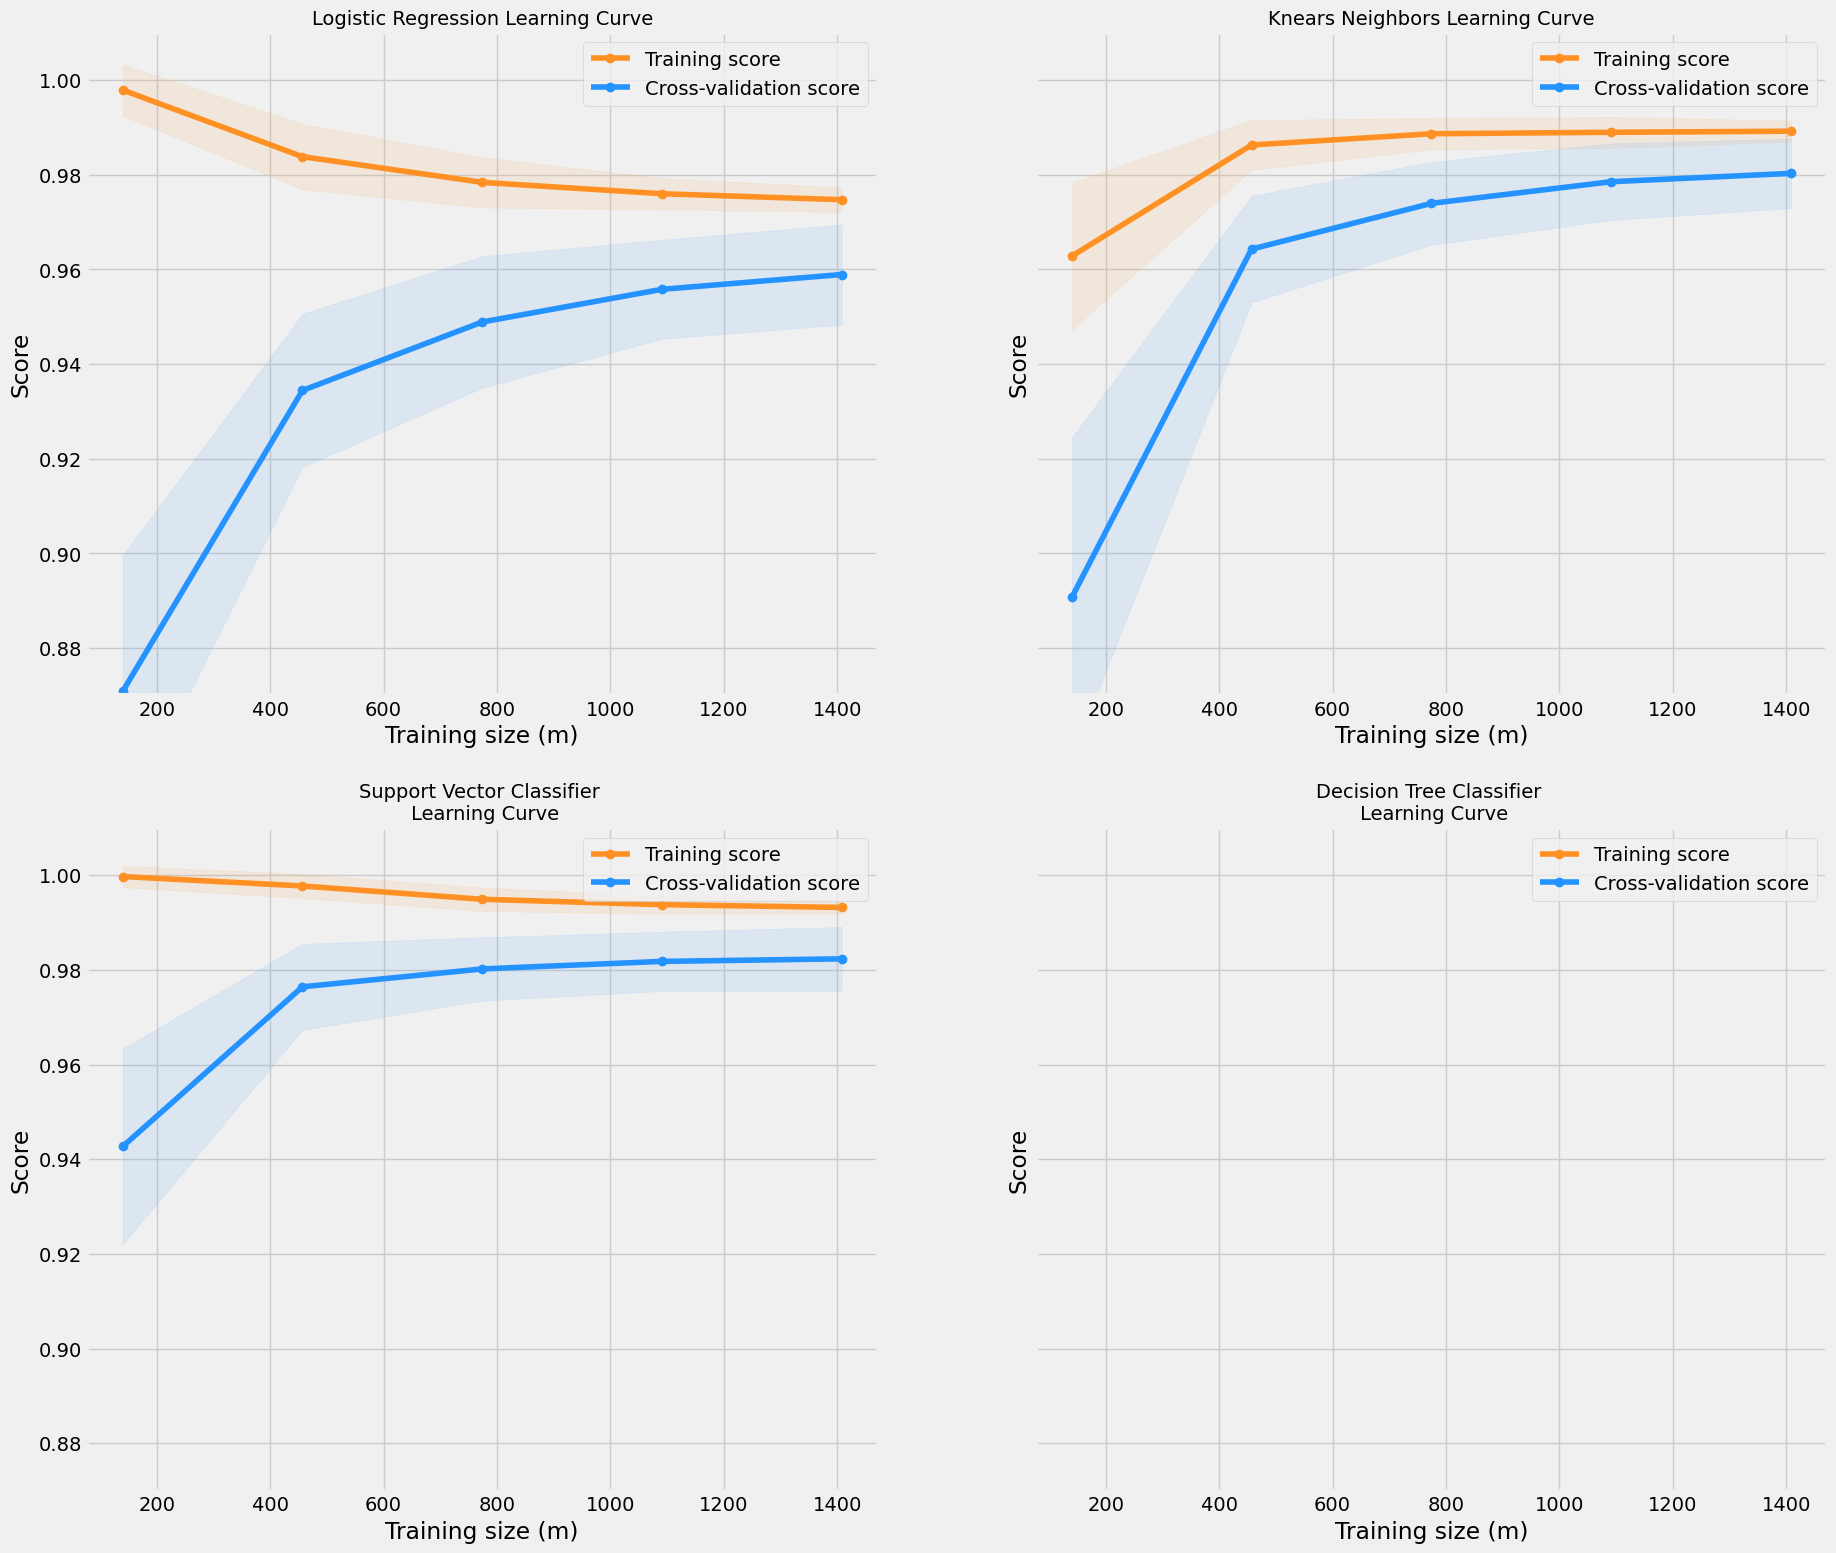

In [110]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, nb_model, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [111]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [120]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.
import time
# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(X_train, y_train)
t1 = time.time()

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [132]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)





In [133]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))


Logistic Regression:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.79      0.75      0.77        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.96      0.98        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.86      0.83      0.84        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.83      0.91      0.87        11
       maize       0.94      0.71      0.81        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.84      0.88      0.86        24
    mungbean       0.90      1.00      0.95        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [137]:
resultMap = {
        'logistic': y_pred_log_reg,
        'knn': y_pred_knear,
        'svc': y_pred_svc,
        'decision_tree': y_pred_tree
    }

@interact
def print_metrics(model=resultMap.keys()):
    Y_predict_test = resultMap[model]
    print(classification_report(y_test, Y_predict_test))
    

interactive(children=(Dropdown(description='model', options=('logistic', 'knn', 'svc', 'decision_tree'), value…

## Applying Neural networks for classification

In [138]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]



model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(distinct_labels), activation='softmax')
])

2023-04-16 22:39:22.281163: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 22:39:30.307537: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [144]:
X_train

array([[ 17.        ,  16.        ,  14.        , ...,  92.18151927,
          6.62553865, 102.944161  ],
       [ 37.        ,  79.        ,  19.        , ...,  69.3478631 ,
          7.14394276,  69.40878198],
       [  7.        ,  73.        ,  25.        , ...,  63.13215259,
          7.28805662,  45.20841071],
       ...,
       [ 11.        ,  36.        ,  31.        , ...,  51.77965917,
          6.47544932, 100.2585673 ],
       [ 11.        , 124.        , 204.        , ...,  80.06633966,
          6.36114111,  71.40043037],
       [ 32.        ,  78.        ,  22.        , ...,  62.35557553,
          7.00703752,  53.40906048]])

In [146]:
y_train

array(['orange', 'blackgram', 'lentil', ..., 'mango', 'grapes', 'lentil'],
      dtype=object)

In [152]:
print(list(distinct_labels))
def category_to_num(label):
    return list(distinct_labels).index(label)

vfunc = np.vectorize(category_to_num)
y_train_num = vfunc(y_train)


['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']


In [153]:
y_train_num

array([16,  7,  8, ..., 11, 12,  8])

In [154]:
y_test_num = vfunc(y_test)

In [139]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 32)                256       
                                                                 
 dense_2 (Dense)             (None, 22)                726       
                                                                 
Total params: 1,038
Trainable params: 1,038
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/anaconda3/envs/homl3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [155]:
model.fit(X_train, y_train_num, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
57/57 - 1s - loss: 24.3567 - accuracy: 0.0724 - val_loss: 9.9012 - val_accuracy: 0.0597 - 536ms/epoch - 9ms/step
Epoch 2/20
57/57 - 0s - loss: 6.9654 - accuracy: 0.1832 - val_loss: 3.5165 - val_accuracy: 0.2188 - 78ms/epoch - 1ms/step
Epoch 3/20
57/57 - 0s - loss: 3.1377 - accuracy: 0.2940 - val_loss: 2.1141 - val_accuracy: 0.3153 - 82ms/epoch - 1ms/step
Epoch 4/20
57/57 - 0s - loss: 1.9524 - accuracy: 0.4013 - val_loss: 1.5583 - val_accuracy: 0.4119 - 79ms/epoch - 1ms/step
Epoch 5/20
57/57 - 0s - loss: 1.4707 - accuracy: 0.4595 - val_loss: 1.2528 - val_accuracy: 0.5284 - 79ms/epoch - 1ms/step
Epoch 6/20
57/57 - 0s - loss: 1.1573 - accuracy: 0.5689 - val_loss: 0.9851 - val_accuracy: 0.6335 - 80ms/epoch - 1ms/step
Epoch 7/20
57/57 - 0s - loss: 0.9574 - accuracy: 0.6548 - val_loss: 0.8062 - val_accuracy: 0.7301 - 92ms/epoch - 2ms/step
Epoch 8/20
57/57 - 0s - loss: 0.8152 - accuracy: 0.6918 - val_loss: 0.7114 - val_accuracy: 0.7642 - 154ms/epoch - 3ms/step
Epoch 9/20
57/57 - 0s

In [156]:
predictions = model.predict(X_test, batch_size=200, verbose=0)

In [159]:
predictions

array([[2.99868852e-10, 1.91910118e-07, 1.88441298e-12, ...,
        5.75196964e-06, 2.95256339e-14, 6.48468995e-06],
       [1.84762431e-11, 5.93049982e-08, 1.13570638e-13, ...,
        2.28349927e-05, 2.56681603e-15, 2.02346860e-06],
       [7.80476184e-05, 1.44873408e-03, 1.86542899e-03, ...,
        1.80413117e-05, 5.67538338e-03, 7.20941098e-05],
       ...,
       [1.96194083e-08, 3.11024077e-02, 6.91929563e-06, ...,
        9.64723229e-01, 1.67861406e-04, 1.37438113e-03],
       [1.07865354e-07, 7.52158239e-02, 4.11301553e-05, ...,
        9.13646221e-01, 9.47686727e-04, 2.16618972e-03],
       [8.07895267e-04, 7.23621846e-13, 6.94391810e-12, ...,
        4.38404534e-16, 1.42489557e-06, 4.86266671e-08]], dtype=float32)

In [160]:
predictions2=np.where(predictions > 0.5, 1,0)

In [161]:
predictions3 = np.argmax(predictions2, axis=1)

In [162]:
predictions2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [163]:
predictions3

array([14, 13, 17, 17, 15, 11, 15,  0,  6,  8,  5, 18,  9, 20,  0,  9, 15,
       19, 17, 14, 21, 17, 16, 17,  2, 20,  6, 18,  4,  0,  9,  8,  0,  8,
        0,  5, 20,  2,  2,  3, 17, 11,  8,  0,  0, 20,  4, 18, 14,  0,  5,
       21, 12,  0, 21,  3, 19, 15, 10,  0, 13,  9,  0,  9,  6,  0, 16,  0,
       14,  4, 14, 18,  0, 10,  5, 17, 10, 19, 13, 16,  1,  2,  0,  5, 16,
        0, 21,  0,  7,  9,  1,  5, 19, 17,  4,  0,  3, 21,  0,  0, 18,  0,
       16, 14, 13,  3, 13,  1,  4,  8,  1,  0, 19, 16,  4,  2, 20, 18,  9,
        0,  4, 12,  5, 16,  2,  5, 18,  0,  1,  8, 10,  8,  9,  2, 18, 16,
        4, 10, 10, 15,  3, 14,  6,  0, 18,  1, 15, 18,  3,  6,  6,  8, 13,
        6,  0,  0,  4,  3,  0, 20,  2, 15, 16,  0,  0, 18, 12,  8, 13, 12,
       12,  7,  9,  2, 18, 20,  8, 12, 13, 20, 21, 21,  3, 20,  0,  3, 10,
        4, 18, 17, 17,  6, 11,  9, 13,  3,  1, 15,  5,  2, 12, 12, 10, 19,
        0,  9,  0, 10,  0,  6, 10,  2,  2,  2, 15,  0,  3,  6, 21,  7,  3,
       11, 11, 18, 17, 15

In [164]:
vfunc2 = np.vectorize(lambda x: distinct_labels[x])
result = vfunc2(predictions3)

In [165]:
print(result)

['muskmelon' 'watermelon' 'papaya' 'papaya' 'apple' 'mango' 'apple' 'rice'
 'mungbean' 'lentil' 'mothbeans' 'coconut' 'pomegranate' 'jute' 'rice'
 'pomegranate' 'apple' 'cotton' 'papaya' 'muskmelon' 'coffee' 'papaya'
 'orange' 'papaya' 'chickpea' 'jute' 'mungbean' 'coconut' 'pigeonpeas'
 'rice' 'pomegranate' 'lentil' 'rice' 'lentil' 'rice' 'mothbeans' 'jute'
 'chickpea' 'chickpea' 'kidneybeans' 'papaya' 'mango' 'lentil' 'rice'
 'rice' 'jute' 'pigeonpeas' 'coconut' 'muskmelon' 'rice' 'mothbeans'
 'coffee' 'grapes' 'rice' 'coffee' 'kidneybeans' 'cotton' 'apple' 'banana'
 'rice' 'watermelon' 'pomegranate' 'rice' 'pomegranate' 'mungbean' 'rice'
 'orange' 'rice' 'muskmelon' 'pigeonpeas' 'muskmelon' 'coconut' 'rice'
 'banana' 'mothbeans' 'papaya' 'banana' 'cotton' 'watermelon' 'orange'
 'maize' 'chickpea' 'rice' 'mothbeans' 'orange' 'rice' 'coffee' 'rice'
 'blackgram' 'pomegranate' 'maize' 'mothbeans' 'cotton' 'papaya'
 'pigeonpeas' 'rice' 'kidneybeans' 'coffee' 'rice' 'rice' 'coconut' 'rice

In [167]:
def print_metrics(Y_test, Y_predict_test):
    print(classification_report(Y_test, Y_predict_test))

print_metrics(y_test_num, predictions3)

              precision    recall  f1-score   support

           0       0.21      0.84      0.33        19
           1       0.45      0.24      0.31        21
           2       1.00      1.00      1.00        26
           3       1.00      0.80      0.89        20
           4       0.84      0.70      0.76        23
           5       0.23      0.12      0.16        24
           6       0.76      0.84      0.80        19
           7       1.00      0.15      0.26        20
           8       0.44      0.73      0.55        11
           9       0.88      0.91      0.89        23
          10       0.88      0.71      0.79        21
          11       1.00      0.89      0.94        19
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        19
          14       1.00      0.94      0.97        17
          15       1.00      1.00      1.00        23
          16       0.85      0.79      0.81        14
          17       0.95    